**Table of contents**<a id='toc0_'></a>    
- [Titanic EDA & Machine Learning](#toc1_)    
  - [Initial Configuration](#toc1_1_)    
  - [EDA](#toc1_2_)    
      - [General Analysis](#toc1_2_1_1_)    
      - [Exploring Ticket Class](#toc1_2_1_2_)    
      - [Exploring the Cabin](#toc1_2_1_3_)    
      - [Exploring Age](#toc1_2_1_4_)    
      - [Exploring the Ports of Embarkmentation](#toc1_2_1_5_)    
      - [Exploring the Genders](#toc1_2_1_6_)    
      - [Exploring Siblings and Spouses](#toc1_2_1_7_)    
      - [Exploring Parents/Children](#toc1_2_1_8_)    
      - [Exploring Ticket Fares](#toc1_2_1_9_)    
  - [Cleaning](#toc1_3_)    
      - [Dropping Passenger ID](#toc1_3_1_1_)    
      - [Dropping Ticket](#toc1_3_1_2_)    
      - [Aggregating SibSP](#toc1_3_1_3_)    
      - [Aggregating Parents/Children](#toc1_3_1_4_)    
      - [Summing Families](#toc1_3_1_5_)    
        - [Removing old columns](#toc1_3_1_5_1_)    
      - [Removing Fare](#toc1_3_1_6_)    
      - [Removing Name](#toc1_3_1_7_)    
      - [Removing Cabin](#toc1_3_1_8_)    
      - [Filling Null Embarkment Values](#toc1_3_1_9_)    
      - [Inferring Age](#toc1_3_1_10_)    
      - [Binning Age](#toc1_3_1_11_)    
      - [Undersampling 3rd Class Individual Men in their 20's and 30's](#toc1_3_1_12_)    
      - [Preparing for Machine Learning](#toc1_3_1_13_)    
        - [Last Minute Charts](#toc1_3_1_13_1_)    
  - [Machine Learning](#toc1_4_)    
      - [Decision Tree Classifier](#toc1_4_1_1_)    
      - [Random Tree Forest](#toc1_4_1_2_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[Titanic EDA & Machine Learning](#toc0_)

## <a id='toc1_1_'></a>[Initial Configuration](#toc0_)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Global Variables
train_path = './train.csv'

## <a id='toc1_2_'></a>[EDA](#toc0_)

#### <a id='toc1_2_1_1_'></a>[General Analysis](#toc0_)

In [ ]:
df = pd.read_csv(train_path)

# Break if the df is empty
assert(df.shape[0] and df.shape[1])

In [ ]:
df.shape

(891, 12)

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
print("Missing Values: \n", end = '-' * 50 + '\n')
for col in df.columns:
    print(col, ": ", df[col].isna().sum())

Missing Values: 
--------------------------------------------------
PassengerId :  0
Survived :  0
Pclass :  0
Name :  0
Sex :  0
Age :  177
SibSp :  0
Parch :  0
Ticket :  0
Fare :  0
Cabin :  687
Embarked :  2


More people (61.6%) ```died``` rather than ```survived```. Truly a tragedy.

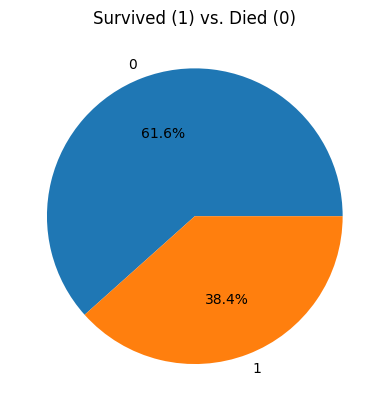

In [ ]:
survived_counts = df['Survived'].value_counts()
plt.pie(survived_counts, labels=survived_counts.keys(), autopct="%1.1f%%")
plt.title("Survived (1) vs. Died (0)")
plt.show()

#### <a id='toc1_2_1_2_'></a>[Exploring Ticket Class](#toc0_)

The pie chart below reveals that over half the passengers were 3rd class, with 24.2% being first class and 20.7% being second class.

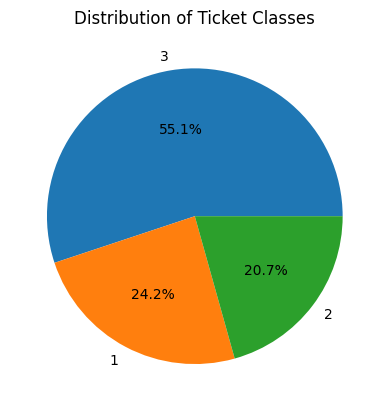

In [ ]:
ticket_class_counts = df['Pclass'].value_counts()
plt.pie(ticket_class_counts, labels=ticket_class_counts.keys(), autopct="%1.1f%%")
plt.title("Distribution of Ticket Classes")
plt.show()

By showing the survival representations for each of the three classes, we are able to see that 1st class has a significantly disproportional survival rate. 2nd class also does better than the "average inhabitant", which makes sense given that the "average inhabitant" is probably part of the 55.1% of those who were in 3rd class, of whom ```24.2%``` survived.

One issue we may see here is that 3rd class has a high representation from the underlying dataset, and also a high correlation with not surviving.

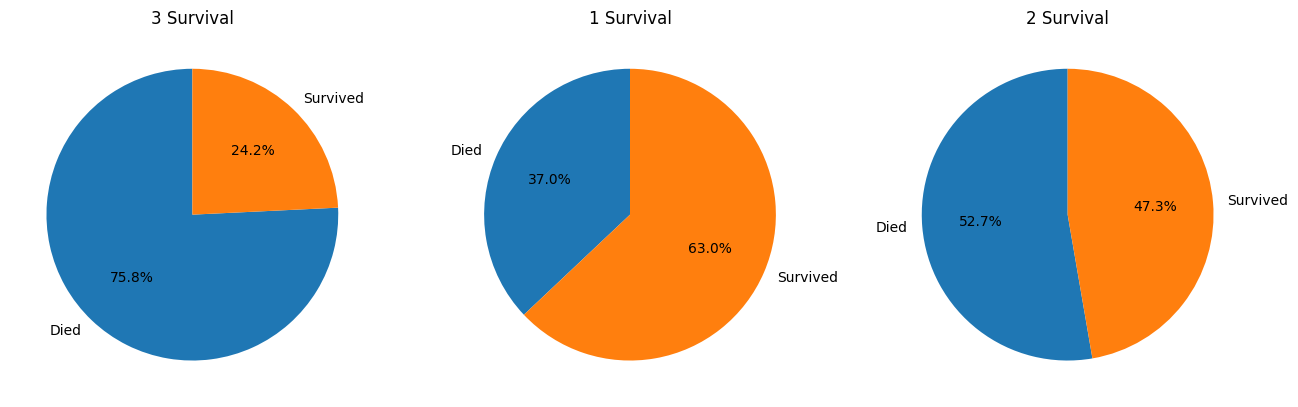

In [ ]:
plot_survival_representation(df, 'Pclass')

#### <a id='toc1_2_1_3_'></a>[Exploring the Cabin](#toc0_)

By looking at the first few entries of the cabin numbers, we are able to see it is a string representing said cabin number and are reaffirmed that there are a decent amount of missing values here. Given that we have ```891``` entries in our training data and ```687``` missing values, this variable is nearly useless for filling missing values (whether statistical, binned, or inferred). 

This is quite unfortunate, since cabin numbers do have some useful statistical representation in correlation with survival given that they have proximity to life rafts, and that certain parts of the ship were quickly filled with water, whereas others may have given people a longer time to evacuate.

As shown in the blueprint illustration below, we do know that the higher-alphabetical cabin numbers are the lower ones (which were submerged most quickly), which may be of interest.

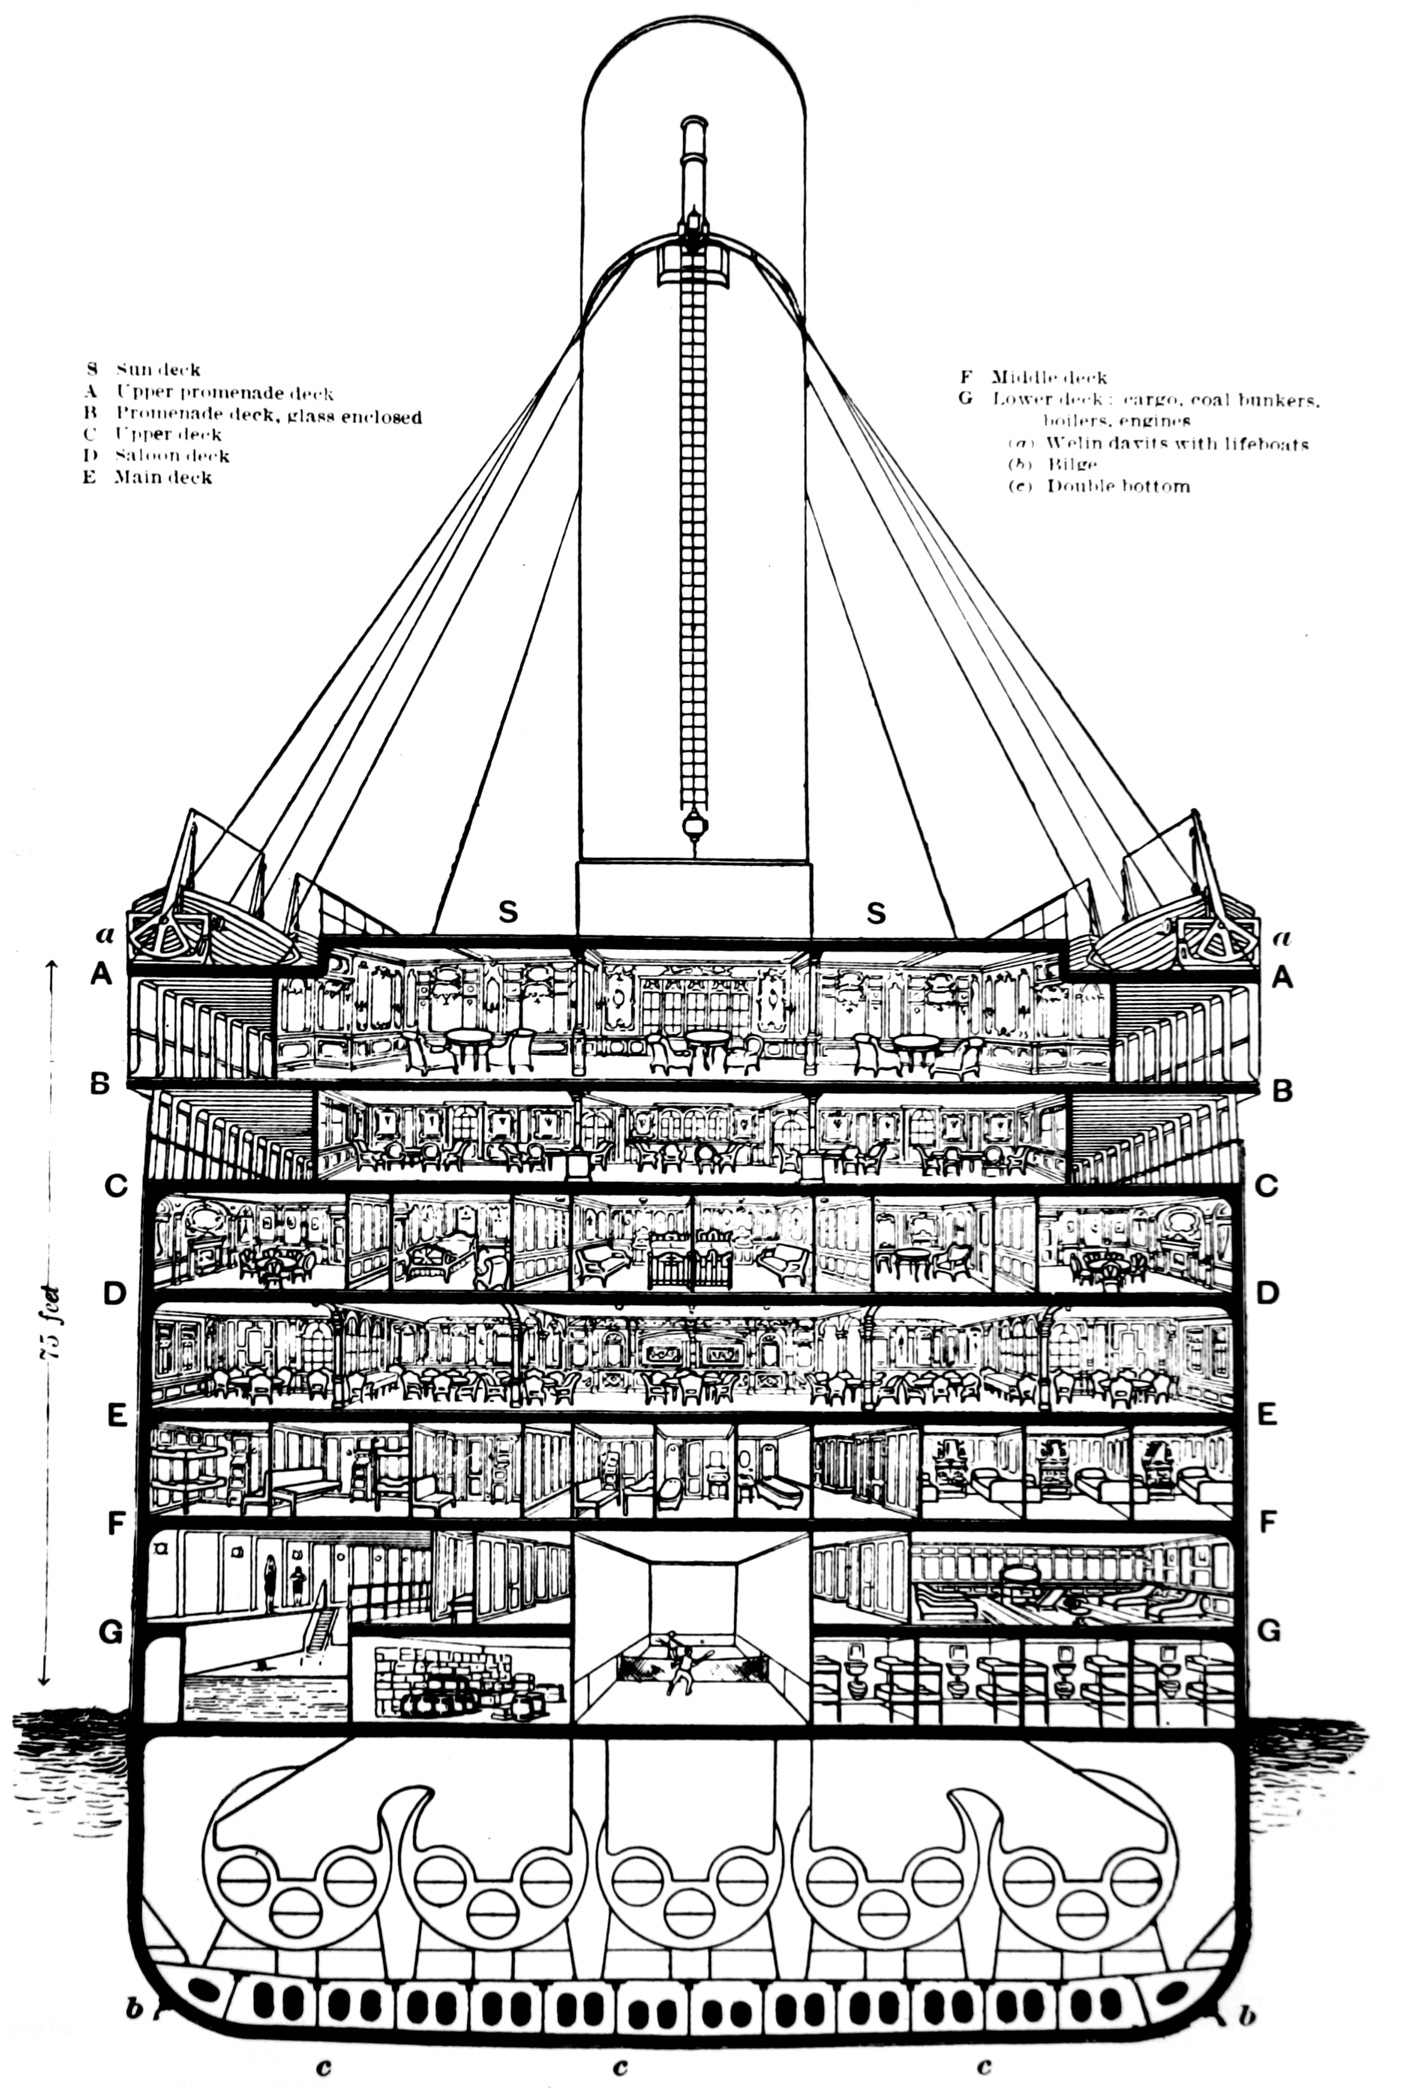

In [ ]:
df['Cabin'].head(5)

0     NaN
1     C85
2     NaN
3    C123
4     NaN
Name: Cabin, dtype: object

In [ ]:
df['Cabin'].value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

#### <a id='toc1_2_1_4_'></a>[Exploring Age](#toc0_)

Showing a boxplot of the ages, we see that most passengers are between 0 and 65 (which generally was a good representation of the human population at the time). Older folks between 65-80 are outliers. 

It may be useful to bin these ages and analyze survivors between these bins.

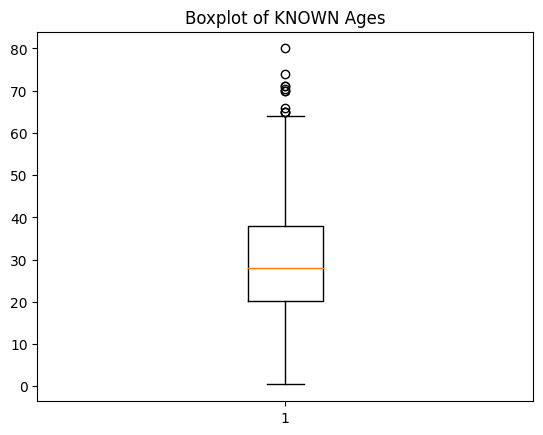

In [ ]:
plt.boxplot(df.dropna(subset=['Age'])['Age'])
plt.title("Boxplot of KNOWN Ages")
plt.show()

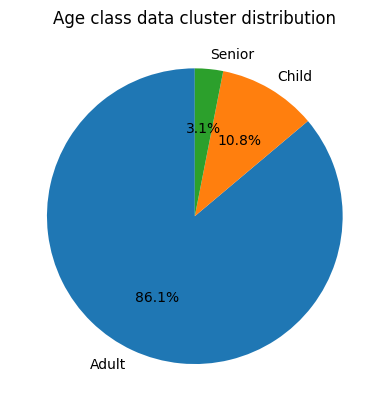

In [ ]:
# Define the bin edges and labels
bins = [0, 14, 60, float('inf')]  # The bin edges

labels = [1, 2, 3]  # The corresponding labels for the bins

df.dropna(subset=['Age'], inplace=True)

# Create the "Age Group" column
df['Age_group'] = pd.cut(df['Age'], bins=bins, labels=labels, include_lowest=True)

# Convert the "Fare_class" column to integers (if needed)
df['Age_group'] = df['Age_group'].astype(int)

fare_class_values = df['Age_group'].value_counts()
plt.pie(fare_class_values, labels=["Adult", "Child", "Senior"], autopct='%1.1f%%', startangle=90)
plt.title("Age class data cluster distribution")
plt.show()

In [ ]:
fare_class_values

Age_group
2    615
1     77
3     22
Name: count, dtype: int64

By binning some conventional age values that might represent one's ability to properly evacuate a sinking ship, we are able to see that indeed, most children lived, a proportional distribution of adults lived, and a disproportional percentage of older folks died.

An issue with this binning is that MOST passengers are of adult age, so this approach may introduce bias in our data. Nonetheless it is interesting.

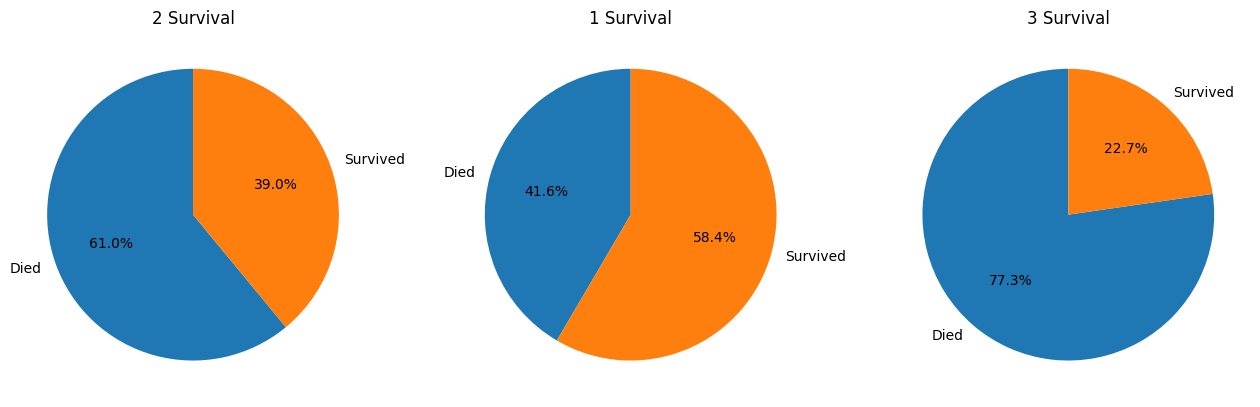

In [ ]:
plot_survival_representation(df, 'Age_group')

In [ ]:
# We dropped the null age values in_place earlier, so we just want our initial un-modified data back for now while we are still just browsing around.
df = pd.read_csv(train_path)

#### <a id='toc1_2_1_5_'></a>[Exploring the Ports of Embarkmentation](#toc0_)

Plotting the various points of embarkmentation origin, we see that most passengers are from Southampton, with Cherbourg and Queenstown following. Queenstown is fairly-severly underrepresented and Southampton is largely overrepresented. Oversampling, undersampling, or feature-engineering may be necessary to improve the representation of the underlying data.

We note that there are ```2``` missing values for the **Embarkmentation** origin. During the data cleaning process these missing values will likely be 'Filled with the mean' of S (Southampton)

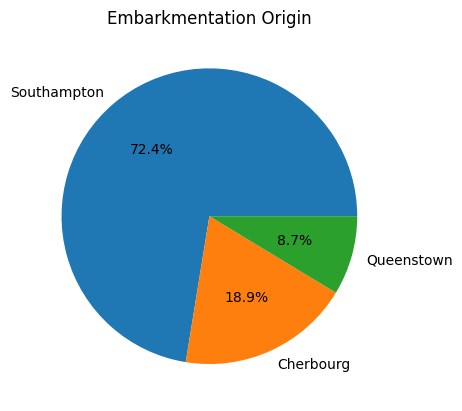

In [ ]:
embarkment_counts = df['Embarked'].value_counts()
plt.pie(embarkment_counts, labels=["Southampton", "Cherbourg", "Queenstown"], autopct='%1.1f%%')
plt.title("Embarkmentation Origin")
plt.show()

In [ ]:
# Helper function to plot side-by-side pie charts for the different survival rates for differing values in a column
def plot_survival_representation(df, col):
    grouped = df.groupby([col, 'Survived']).size().unstack().fillna(0)
    value_counts = df[col].value_counts()
    fig, axes = plt.subplots(1, len(value_counts.keys()), figsize=(16,6))
    for idx, key in enumerate(value_counts.keys()):
        axes[idx].pie(grouped.loc[key], labels=["Died", "Survived"], autopct='%1.1f%%', startangle=90)
        axes[idx].set_title(str(key) + " Survival")
    plt.show()

More people from ``Cherbourg``` survived than those from other ports of embarkmentation. The other two ports are relatively close to the survival rates of general population.

We note that the Titanic's route was Southampton -> Cherbourg -> Queenstown

* One hypothesis here is that the sequence of rooms occupied by the populations from each port of embarkment may have had certain proximity to life-rafts to increase survival rating.
* Another hypothesis is that Cherbourg citizens tended to be more families where women and children were saved

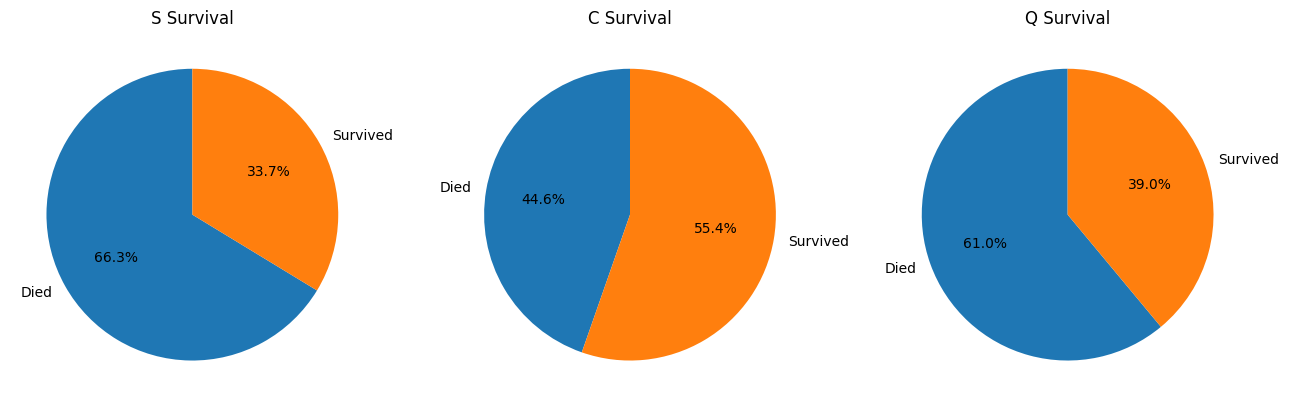

In [ ]:
plot_survival_representation(df, 'Embarked')

In [ ]:
# Shows distribution of a column and the ticket classes
def plot_ticket_class_representation(df, col):
    grouped = df.groupby([col, 'Pclass']).size().unstack().fillna(0)
    value_counts = df[col].value_counts()
    fig, axes = plt.subplots(1, len(value_counts.keys()), figsize=(16,6))
    for idx, key in enumerate(value_counts.keys()):
        axes[idx].pie(grouped.loc[key], labels=["1st Class", "2nd Class", "3rd Class"], autopct='%1.1f%%', startangle=90)
        axes[idx].set_title(str(key) + " Ticket Classes")
    plt.show()

Through showing the distribution of ticket classes between the embarkment locations we are able to see some interesting details.
* The ```Cherbourg``` passengers, of whom most disproportionately survived, are largely first class, which may accredit their high survival rates.
* The ```Queenstown``` Irish passengers were almost exclusively 3rd class. They also had a higher survival rate than those from Southampton. One hypothesis for this is that they had more families, which were prioritized in lifeboats (and statistically had higher survival rates). Another hypothesis is that the Irish were the last on the boat, and may have occuppied more of the middle decks, which took longer to fill with water, therefore increasing their time to find a lifeboat and thus their chances of survival.
* The ```Southampton``` passengers have the closest ticket class distribution to the average passenger (though also most passengers were from southampton)

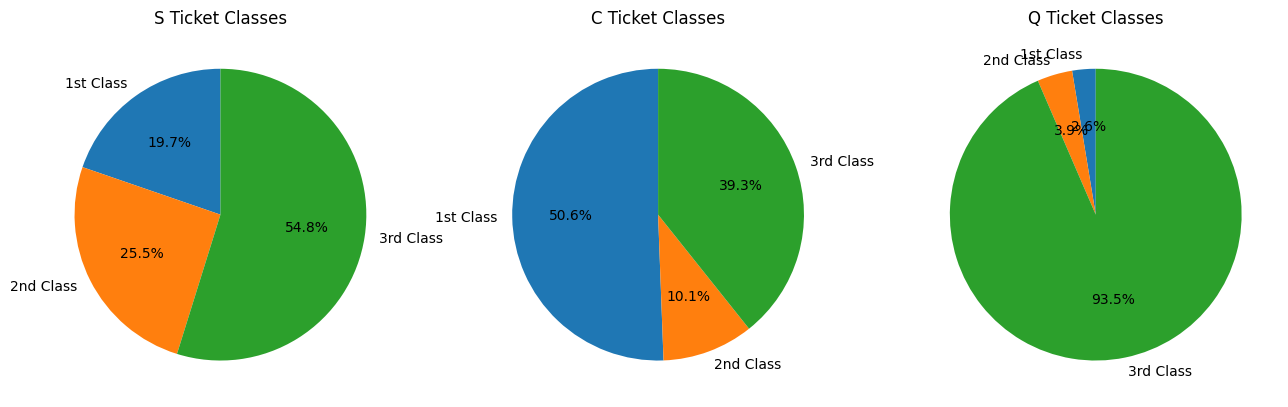

In [ ]:
plot_ticket_class_representation(df, "Embarked")

#### <a id='toc1_2_1_6_'></a>[Exploring the Genders](#toc0_)

Showing that the only values of **Sex** in this dataset are ```male``` and ```female``` is useful in that the column can be simply later encoded into a boolean representation

In [ ]:
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

There is an imbalance of ```male``` representation on the titanic that will need to be accounted for.

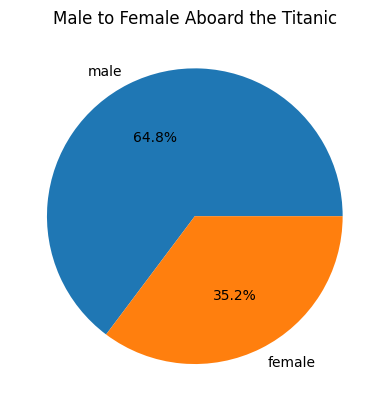

In [ ]:
sex_counts = df['Sex'].value_counts()
plt.pie(sex_counts, labels = sex_counts.keys(), autopct="%1.1f%%")
plt.title("Male to Female Aboard the Titanic")
plt.show()

Significantly more men died than women. In fact the survival rate between the two genders is nearly inverse. Note that one immediate hypothesis is that women and children were prioritized in evacuation of the life rafts.

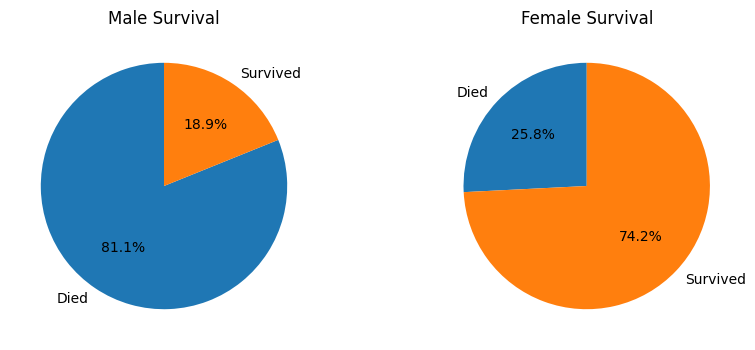

In [ ]:
# Group the data by 'Sex' and 'Survived' and count the occurrences
grouped = df.groupby(['Sex', 'Survived']).size().unstack()

# Create two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Plot the male pie chart on the first subplot
ax1.pie(grouped.loc['male'], labels=['Died', 'Survived'], autopct='%1.1f%%', startangle=90)
ax1.set_title('Male Survival')

# Plot the female pie chart on the second subplot
ax2.pie(grouped.loc['female'], labels=['Died', 'Survived'], autopct='%1.1f%%', startangle=90)
ax2.set_title('Female Survival')

plt.show()

Most people went without any **Siblings or Spouses**. A large remainder of the chunk (23.5%) went about with only a single sibling/spouse (which I hypothesize is more likely a spouse than sibling). The remaining 6-7% went with greater than 1 sibling or spouse. This data may need to be binned in a cleaner way. 

Some initial thoughts are:
* Boolean variable "Singleton" for whether they are single or not
* Categorical variable for family size > 2
* Figuring out a categorical variable for "Singleton" "Couple" or "Child"

#### <a id='toc1_2_1_7_'></a>[Exploring Siblings and Spouses](#toc0_)

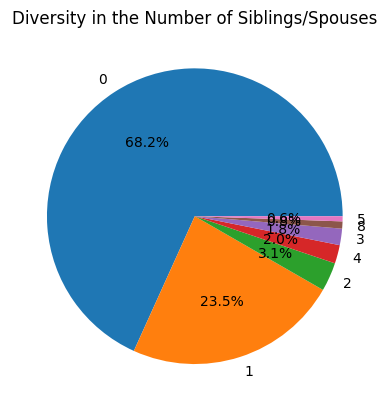

In [ ]:
sibSp_values = df['SibSp'].value_counts()
plt.pie(sibSp_values, labels=sibSp_values.keys(), autopct='%1.1f%%')
plt.title("Diversity in the Number of Siblings/Spouses")
plt.show()

In [ ]:
sibSp_values

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

Plotting the survival rate for each possible frequency of siblings and spouses gives us some insights as well.
* Survival rate was best for those with a single sibling/spouse
* Survival rate was quite high as well for those with exactly 2 siblings/spouses (which likely means children rather than polyamorous couples)
* Survival rate was lower than that of singletons for children with 3 or 4 siblings
* The few groups with 5 or 8 siblings entirely perished
* Singletons did relatively well, outperforming larger families, but not outperforming smaller families

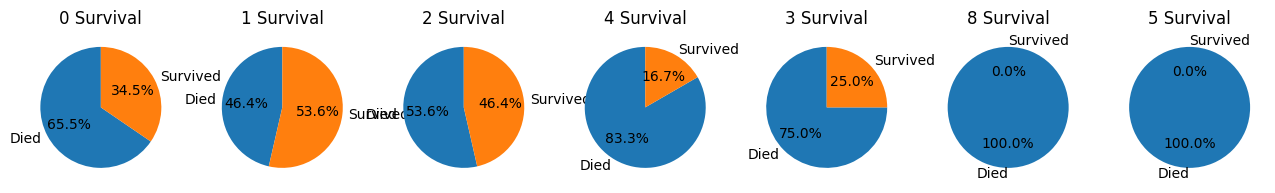

In [ ]:
# Group the data by 'Sex' and 'Survived' and count the occurrences
grouped = df.groupby(['SibSp', 'Survived']).size().unstack().fillna(0)

# Create two subplots side by side
fig, axes = plt.subplots(1, len(sibSp_values.keys()), figsize=(16, 6))

for idx, key in enumerate(sibSp_values.keys()):
    axes[idx].pie(grouped.loc[key], labels=["Died", "Survived"], autopct='%1.1f%%', startangle=90)
    axes[idx].set_title(str(key) + " Survival")
    if idx > 10:
        break

plt.show()

#### <a id='toc1_2_1_8_'></a>[Exploring Parents/Children](#toc0_)

When plotting the distribution of **Parents/Children** we see even less diversity than the siblings/spouses. This makes sense because the "childless couples" demographic is not represented here, and most families that were able to board the titanic did not bring more than 2 children.

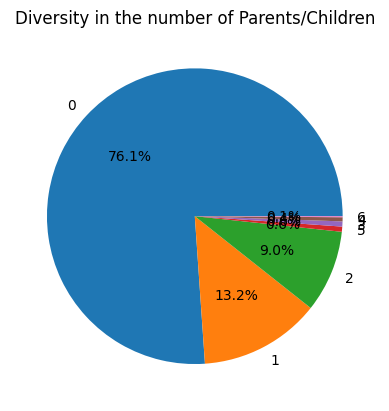

In [ ]:
parch_values = df['Parch'].value_counts()
plt.pie(parch_values, labels=parch_values.keys(), autopct='%1.1f%%')
plt.title("Diversity in the number of Parents/Children")
plt.show()

Here we explore the survival rate of the various groups of number of parents/children. This gives us some pretty valuable insights as well.
* Those without any parents nor children had a 34.4% survival rate, which nearly exactly matches that of the singletons for no siblings/spouses. NOTE it may be worth making an aggregate boolean variable for those without sibnligs, spouses, parents, nor children
* Those with a single parent or child had a strong survival rate at 55.1%
* Those with 2 parents or 2 children also exibited a strong survival rate of 50.0%
* Those with (most likely) 3 children had the best survival rate of 60.0%
* Those with 4 children and with 6 children perished entirely

In general terms, one can hypothesize that the small families (those with 3 or fewer children) (or children with 1 or 2 parents) had the greatest chance of survival. These chances worsened with increased family sizes (which are completely under-represented anyway).

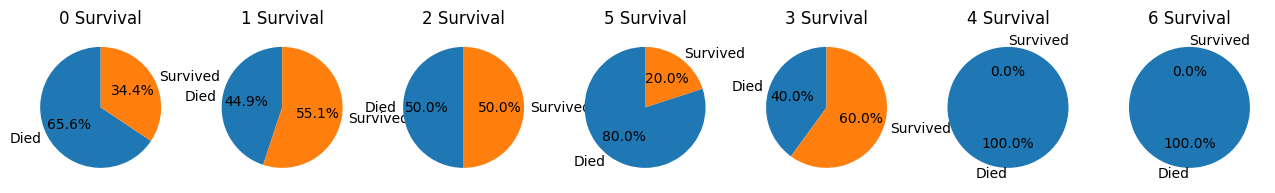

In [ ]:
# Group the data by 'Sex' and 'Survived' and count the occurrences
grouped = df.groupby(['Parch', 'Survived']).size().unstack().fillna(0)

# Create two subplots side by side
fig, axes = plt.subplots(1, len(parch_values.keys()), figsize=(16, 6))

for idx, key in enumerate(parch_values.keys()):
    axes[idx].pie(grouped.loc[key], labels=["Died", "Survived"], autopct='%1.1f%%', startangle=90)
    axes[idx].set_title(str(key) + " Survival")

plt.show()

#### <a id='toc1_2_1_9_'></a>[Exploring Ticket Fares](#toc0_)

We get some interesting insights regarding the ticket fares boxplot shown below.
* Most people payed between $10 and $60 with a mean of ```$32```.
* There are **two** clusters of outliers. One is for tickets between $70-170, and a second smaller cluster for tickets between $200-300. It is possible these clusters represent higher-class tickets
* There is an outlier(s) of ```$500``` fare price. This may need to be removed, or binned into another category, since it is such an extreme outlier

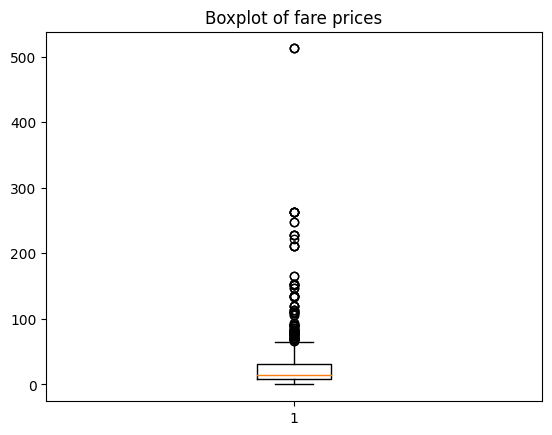

In [ ]:
plt.boxplot(df['Fare'])
plt.title("Boxplot of fare prices")
plt.show()

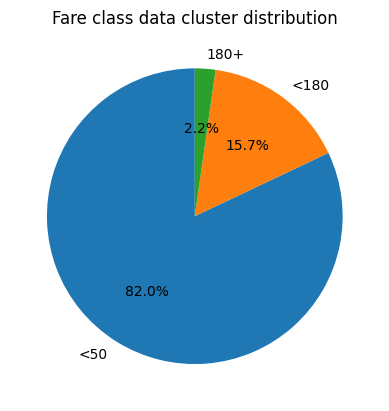

In [ ]:
# Define the bin edges and labels
bins = [0, 50, 180, float('inf')]  # The bin edges
labels = [1, 2, 3]  # The corresponding labels for the bins

# Create the "Fare_class" column
df['Fare_class'] = pd.cut(df['Fare'], bins=bins, labels=labels, include_lowest=True)

# Convert the "Fare_class" column to integers (if needed)
df['Fare_class'] = df['Fare_class'].astype(int)

fare_class_values = df['Fare_class'].value_counts()
plt.pie(fare_class_values, labels=["<50", "<180", "180+"], autopct='%1.1f%%', startangle=90)
plt.title("Fare class data cluster distribution")
plt.show()

When we plot the survival rate of those with ticket prices, we see that the cheapest class died, and the expensivest ticket prices survived at a higher rate than any other variable yet seen.

Also we can play around with binning if we want to keep this ```Fare_class`` variable we have engineered, since it looks like the relevance between the 2 likely fairs of tickets and their pertainance to survival are nearly the same, and the highest value of ticket price cluster is severely underrepresented and would likely introduce bias.

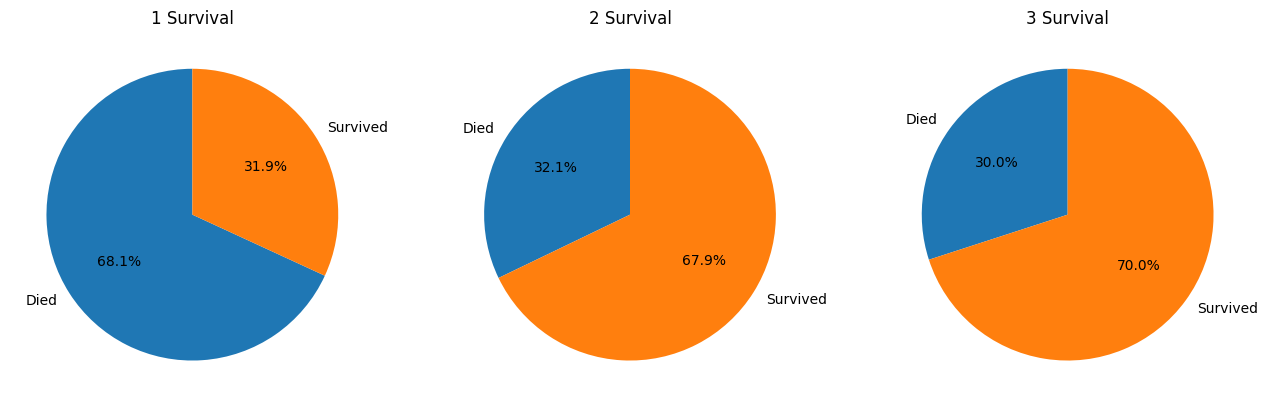

In [ ]:
plot_survival_representation(df, 'Fare_class')

## <a id='toc1_3_'></a>[Cleaning](#toc0_)

From our EDA, we have noted a few necessary considerations to make during the Data Cleaning phase before it is fed into a statistical model.

* **ID** is useless (unless we're cheating), it can be removed.
* **Ticket number** is also useless and can be removed.
* The target variable of **Survived** has a slightly disproportionate distribution of those who perished.
* The **Ticket Class** (Pclass) has a disproportionate distribution of 3rd class passengers, and a few less 1st class passengers.
* There are more men than women on the titanic. Significantly more men perished than women.
* There are quite a few missing values for age, yet there is useful statistical representation in the variable. It may be useful to infer the age from other parameters if possible. If this is done, it will further be useful to bin the age into groups, since there are quite a few outliers of those older than 50.
* **SibSp** is a multiclass variable with a few classes that have nearly no representation. Larger bins of SibSp should be aggregated. The same goes for **Parch**.
* **SibSp** and **Parch** may share significant dimensionality. This will need to be mitigated, possibly through combining them into a "family_size" variable.
* **Fare** has quite a few outliers, and shares dimensionality with the **Ticket Class**. It is possible this variable could simply be removed, or that it could be aggregated with ticket class in some useful way.
* **Cabin** has a large amount of missing values and inferring them may be challenging. Likewise the "Ticket Class" would likely share a decent amount of dimensionality with the ticket class. For now we will remove it, and on further iterations we will try to infer it or perform feature engineering.
* **Embarked** has slight imbalances in that most people came from the initial port of Southampton. There also may be some correlation between wealth, family size, and ticket class and those from Cherbourg that is more representative of underlying survival chances than the actual port of embarkment.

#### <a id='toc1_3_1_1_'></a>[Dropping Passenger ID](#toc0_)

In [ ]:
if "PassengerId" in df.columns:
    df.drop(['PassengerId'], axis=1, inplace=True)

assert("PassengerId" not in df.columns)
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'Fare_class'],
      dtype='object')

#### <a id='toc1_3_1_2_'></a>[Dropping Ticket](#toc0_)

In [ ]:
if "Ticket" in df.columns:
    df.drop(['Ticket'], axis=1, inplace=True)

assert("Ticket" not in df.columns)
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Cabin', 'Embarked', 'Fare_class'],
      dtype='object')

#### <a id='toc1_3_1_3_'></a>[Aggregating SibSP](#toc0_)

Here all values of Siblings/Spouses > 2 are just set to 2 because they are severely underrepresented and all have 100% fatality rates, which will surely introduce great bias into a ML algorithm

In [ ]:
# All values > 2 are 2
df.loc[df['SibSp'] >= 2, 'SibSp'] = 2

The new representation, while still underrepresented, is a little cleaner

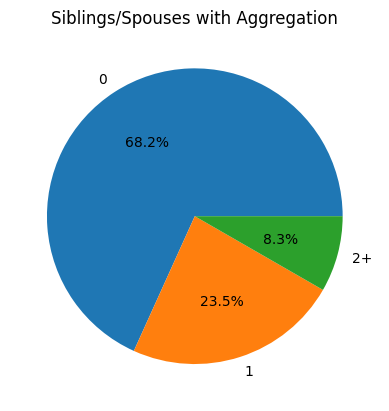

In [ ]:
plt.pie(df["SibSp"].value_counts(), labels=["0", "1", "2+"], autopct='%1.1f%%')
plt.title("Siblings/Spouses with Aggregation")
plt.show()

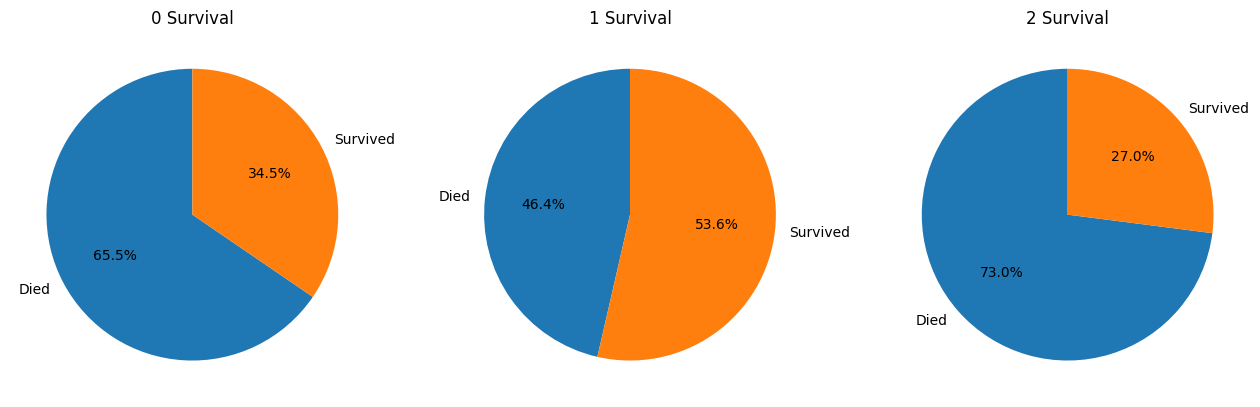

In [ ]:
plot_survival_representation(df, "SibSp")

#### <a id='toc1_3_1_4_'></a>[Aggregating Parents/Children](#toc0_)

Likewise with the Siblings/Spouses, we will bin the larger families toegether in an effort to reduce bias and underrepresentation of highly-correlated data to survival

In [ ]:
# All values > 2 are 2
df.loc[df['Parch'] >= 2, 'Parch'] = 2

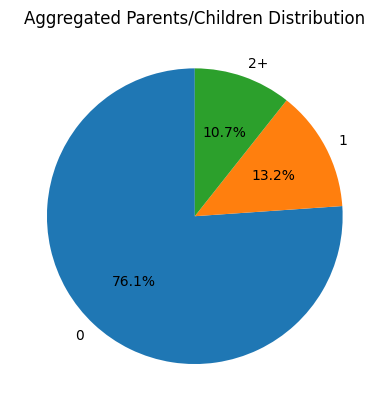

In [ ]:
plt.pie(df['Parch'].value_counts(), labels=['0', '1', '2+'], autopct="%1.1f%%", startangle=90)
plt.title("Aggregated Parents/Children Distribution")
plt.show()

#### <a id='toc1_3_1_5_'></a>[Summing Families](#toc0_)

In [ ]:
df['family_sum'] = df['Parch'] + df['SibSp']

In [ ]:
family_sums = df['family_sum'].value_counts()

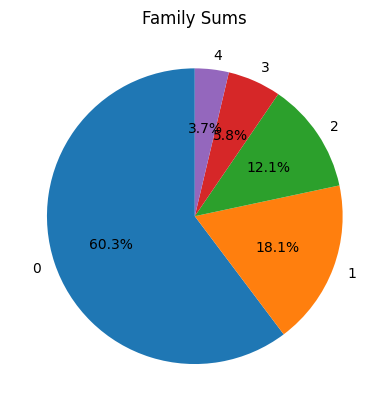

In [ ]:
plt.pie(family_sums, labels=family_sums.keys(), autopct='%1.1f%%', startangle=90)
plt.title("Family Sums")
plt.show()

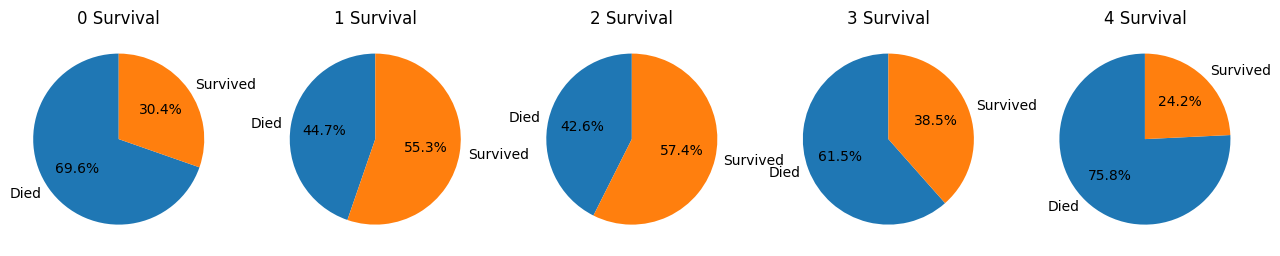

In [ ]:
plot_survival_representation(df, "family_sum")

This looks good, but we still have 3 and 4 people in the family being severely underrepresented so we will aggregate them together into a ```3+``` bin

In [ ]:
# All values > 3 are 3
df.loc[df['family_sum'] >= 3, 'family_sum'] = 3

In [ ]:
# Define the bin edges and labels
# bins = [0, 1, 2, float('inf')]  # The bin edges

# labels = [0, 1, 2]  # The corresponding labels for the bins

# # Create the "Age Group" column
# df['sib_group'] = pd.cut(df['SibSp'], bins=bins, labels=labels, include_lowest=True)

# # Convert the "Fare_class" column to integers (if needed)
# df['sib_group'] = df['sib_group'].astype(int)

# fare_class_values = df['sib_group'].value_counts()
# plt.pie(fare_class_values, labels=["0", "1", "2+"], autopct='%1.1f%%', startangle=90)
# plt.title("Sibling/Spouse class data cluster distribution")
# plt.show()

##### <a id='toc1_3_1_5_1_'></a>[Removing old columns](#toc0_)

In [ ]:
# if 'Parch' in df.columns:
#     df.drop(['Parch'], axis=1, inplace=True)

# assert("Parch" not in df.columns)

In [ ]:
if 'sib_group' in df.columns:
    df.drop(['sib_group'], axis=1, inplace=True)

assert("sib_group" not in df.columns)

In [ ]:
# if 'SibSp' in df.columns:
#     df.drop(['SibSp'], axis=1, inplace=True)

# assert('SibSp' not in df.columns)

#### <a id='toc1_3_1_6_'></a>[Removing Fare](#toc0_)

This is a hugely contraversial decision but whatever

In [ ]:
if 'Fare' in df.columns:
    df.drop(['Fare'], axis=1, inplace=True)

assert("Fare" not in df.columns)

#### <a id='toc1_3_1_7_'></a>[Removing Name](#toc0_)

In [ ]:
if 'Name' in df.columns:
    df.drop(['Name'], axis=1, inplace=True)

assert("Name" not in df.columns)

#### <a id='toc1_3_1_8_'></a>[Removing Cabin](#toc0_)

In [ ]:
if 'Cabin' in df.columns:
    df.drop(["Cabin"], axis=1, inplace=True)

assert("Cabin" not in df.columns)

#### <a id='toc1_3_1_9_'></a>[Filling Null Embarkment Values](#toc0_)

There are **2** null embarkment values. We can "replace them with the mean value" by saying these groups are from Southampton, where most passengers embarked from.

In [ ]:
df['Embarked'].isna().sum()

2

In [ ]:
df['Embarked'].fillna('S', inplace=True)
assert(df['Embarked']).isna().sum() == 0

#### <a id='toc1_3_1_10_'></a>[Inferring Age](#toc0_)

In [ ]:
df.isna().sum()

Survived        0
Pclass          0
Sex             0
Age           177
SibSp           0
Parch           0
Embarked        0
Fare_class      0
family_sum      0
dtype: int64

In [ ]:
train_data = df.dropna(subset=['Age'])
test_data = df[df['Age'].isna()]

train_data_encoded = pd.get_dummies(train_data, columns=['Sex', 'Embarked'])
test_data_encoded = pd.get_dummies(test_data, columns=['Sex', 'Embarked'])

features = ['Survived', 'Pclass', 'Fare_class', 'family_sum', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']
target = 'Age'

In [ ]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor()
regressor.fit(train_data_encoded[features], train_data_encoded[target])

DecisionTreeRegressor()

In [ ]:
predicted_ages = regressor.predict(test_data_encoded[features]).round().astype(int)

df.loc[df['Age'].isna(), 'Age'] = predicted_ages
df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Fare_class,family_sum
0,0,3,male,22.0,1,0,S,1,1
1,1,1,female,38.0,1,0,C,2,1
2,1,3,female,26.0,0,0,S,1,0
3,1,1,female,35.0,1,0,S,2,1
4,0,3,male,35.0,0,0,S,1,0
5,0,3,male,38.0,0,0,Q,1,0
6,0,1,male,54.0,0,0,S,2,0
7,0,3,male,2.0,2,1,S,1,3
8,1,3,female,27.0,0,2,S,1,2
9,1,2,female,14.0,1,0,C,1,1


In [ ]:
# Break if there are any null values at this pointz
null_Values = df.isna().sum()
for key in null_Values:
    assert(null_Values[key] == 0)

In [ ]:
df['Age'].value_counts()

Age
29.00    74
18.00    54
38.00    36
24.00    33
30.00    30
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64

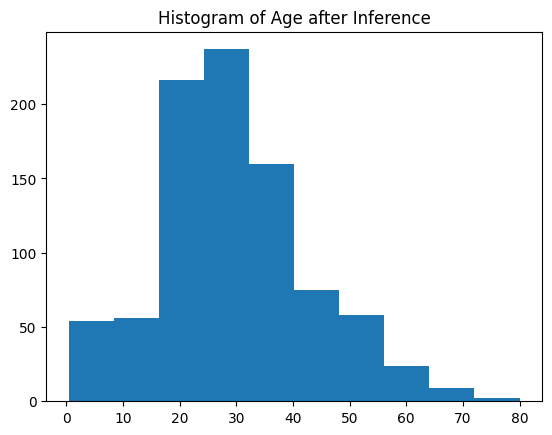

In [ ]:
plt.hist(df['Age'])
plt.title("Histogram of Age after Inference")
plt.show()

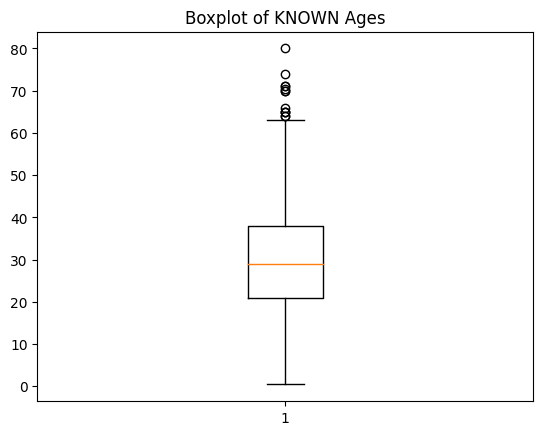

In [ ]:
plt.boxplot(df['Age'])
plt.title("Boxplot of KNOWN Ages")
plt.show()

#### <a id='toc1_3_1_11_'></a>[Binning Age](#toc0_)

Age_group
2    440
3    249
4    116
1     86
Name: count, dtype: int64


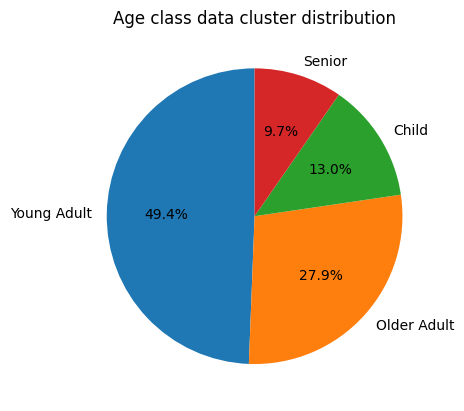

In [ ]:
# Define the bin edges and labels
bins = [0, 14, 30, 45, float('inf')]
# bins = [0, 14, 50, float('inf')]  # The bin edges
# bins = [0, 14, float('inf')]  # The bin edges

labels = [1, 2, 3, 4]
# labels = [1, 2, 3]  # The corresponding labels for the bins
# labels = [1, 2]

# Create the "Age Group" column
df['Age_group'] = pd.cut(df['Age'], bins=bins, labels=labels, include_lowest=True)

# Convert the "Fare_class" column to integers (if needed)
df['Age_group'] = df['Age_group'].astype(int)

fare_class_values = df['Age_group'].value_counts()
print(fare_class_values)
plt.pie(fare_class_values, labels=["Young Adult", "Older Adult", "Child", "Senior"], autopct='%1.1f%%', startangle=90)
# plt.pie(fare_class_values, labels=["Adult", "Child", "Senior"], autopct='%1.1f%%', startangle=90)
# plt.pie(fare_class_values, labels=["Adult", "Child"], autopct='%1.1f%%', startangle=90)
plt.title("Age class data cluster distribution")
plt.show()

#### <a id='toc1_3_1_12_'></a>[Undersampling 3rd Class Individual Men in their 20's and 30's](#toc0_)

In [ ]:
df['Age_group'].value_counts()

Age_group
2    440
3    249
4    116
1     86
Name: count, dtype: int64

In [ ]:
df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Fare_class,family_sum,Age_group
0,0,3,male,22.0,1,0,S,1,1,2
1,1,1,female,38.0,1,0,C,2,1,3
2,1,3,female,26.0,0,0,S,1,0,2
3,1,1,female,35.0,1,0,S,2,1,3
4,0,3,male,35.0,0,0,S,1,0,3
5,0,3,male,38.0,0,0,Q,1,0,3
6,0,1,male,54.0,0,0,S,2,0,4
7,0,3,male,2.0,2,1,S,1,3,1
8,1,3,female,27.0,0,2,S,1,2,2
9,1,2,female,14.0,1,0,C,1,1,1


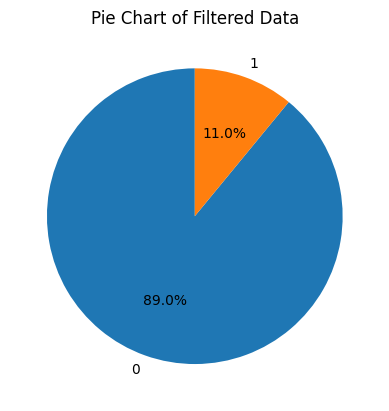

In [ ]:
# Filter the DataFrame based on your criteria
filtered_df = df[(df['Sex'] == 'male') & (df['Pclass'] == 3) & (df['family_sum'] == 0) & (df['Embarked'] == 'S') & (df['Age_group'] == 2)]

# Count the number of rows in the filtered DataFrame
counts = filtered_df['Survived'].value_counts()
# Create a pie chart
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Pie Chart of Filtered Data')
plt.show()

In [ ]:
print("The ratio of the demographic of singleton 3rd class men between 18 and 34 is", filtered_df.shape[0]/df.shape[0])

The ratio of the demographic of singleton 3rd class men between 18 and 34 is 0.1638608305274972


In [ ]:
# sampled_data = filtered_df.sample(n=len(filtered_df)//2, random_state=42)
# df = df.drop(sampled_data.index)

# len(df)

#### <a id='toc1_3_1_13_'></a>[Preparing for Machine Learning](#toc0_)

In [ ]:
df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Fare_class,family_sum,Age_group
0,0,3,male,22.0,1,0,S,1,1,2
1,1,1,female,38.0,1,0,C,2,1,3
2,1,3,female,26.0,0,0,S,1,0,2
3,1,1,female,35.0,1,0,S,2,1,3
4,0,3,male,35.0,0,0,S,1,0,3
5,0,3,male,38.0,0,0,Q,1,0,3
6,0,1,male,54.0,0,0,S,2,0,4
7,0,3,male,2.0,2,1,S,1,3,1
8,1,3,female,27.0,0,2,S,1,2,2
9,1,2,female,14.0,1,0,C,1,1,1


In [ ]:
df['Pclass'] = df['Pclass'].astype(str)
df['Age_group'] = df['Age_group'].astype(str)

if "Parch" in df.columns:
    df['Parch'] = df['Parch'].astype(str)

if "SibSp" in df.columns:
    df['SibSp'] = df['SibSp'].astype(str)

In [ ]:
from sklearn.model_selection import train_test_split

train_data = []

data_encoded = pd.get_dummies(df, columns=['Age_group', 'Sex', 'Pclass', 'Parch', 'SibSp', 'Embarked', 'Fare_class', 'family_sum'])
# test_data_encoded = pd.get_dummies(test_data, columns=['Sex', 'Embarked', 'Fare_class', 'family_sum'])

features = ['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Embarked_C', 'Embarked_Q',
            'Embarked_S',
            # 'Fare_class_1', 'Fare_class_2', 'Fare_class_3',
            # 'Age', 
            # 'Age_group_1', 'Age_group_2', 'Age_group_3',
            'Age_group_1', 'Age_group_2', 'Age_group_3', 'Age_group_4',
            'Parch_0', 'Parch_1', 'Parch_2',
            "SibSp_0", 'SibSp_1', 'SibSp_2',
            # 'family_sum_0', 'family_sum_1', 'family_sum_2', 'family_sum_3',
            ]
target = 'Survived'

X_train, X_test, y_train, y_test = train_test_split(data_encoded[features], data_encoded[target], test_size=0.10, random_state=42)

In [ ]:
type(X_train)

pandas.core.frame.DataFrame

##### <a id='toc1_3_1_13_1_'></a>[Last Minute Charts](#toc0_)

([<matplotlib.patches.Wedge at 0x16aed8ed0>,
 [Text(-0.3487593016911999, 1.0432482683828748, '0'),
  Text(-0.38531884756633594, -1.0303054817432309, '1'),
  Text(0.6125374966376647, -0.9136727068337235, '2'),
  Text(1.0509666703451506, -0.32476000034429753, '3')])

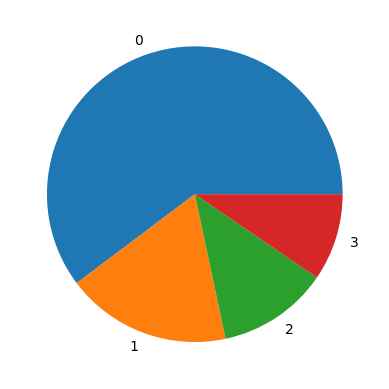

In [ ]:
plt.pie(df['family_sum'].value_counts(), labels=df['family_sum'].value_counts().keys())

([<matplotlib.patches.Wedge at 0x28cf35910>,
 [Text(-0.7144665279950492, 0.836383632297225, 'S'),
  Text(0.46400099082156876, -0.9973480237693373, 'C'),
  Text(1.059707924452334, -0.29499002500580673, 'Q')])

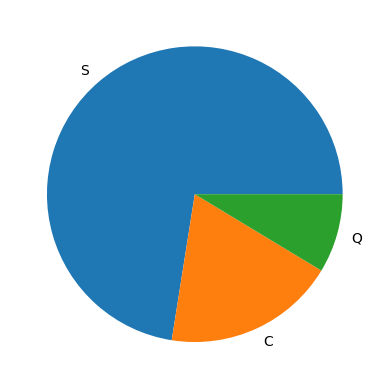

In [ ]:
plt.pie(df['Embarked'].value_counts(), labels=df['Embarked'].value_counts().keys())

([<matplotlib.patches.Wedge at 0x28c101910>,
 [Text(-0.17571616709359641, 1.0858746836637898, '3'),
  Text(-0.5160762002061154, -0.9714243951954356, '1'),
  Text(0.8765111456658484, -0.6646263698677192, '2')])

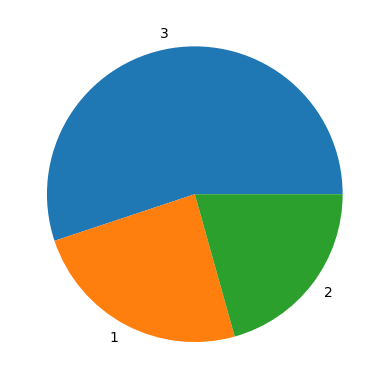

In [ ]:
# 3rd class could really use some undersampling
plt.pie(df['Pclass'].value_counts(), labels=df['Pclass'].value_counts().keys())

([<matplotlib.patches.Wedge at 0x16cb9f290>,
 [Text(-0.4919454136803954, 0.9838646807152012, ''),
  Text(0.4919455057964525, -0.9838646346559433, '')])

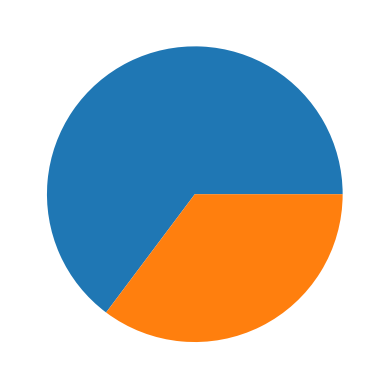

In [ ]:
plt.pie(data_encoded['Sex_female'].value_counts())

## <a id='toc1_4_'></a>[Machine Learning](#toc0_)

There are some observations to note when modifying the data:

* **Undersampling**: The metrics for all models improve accross the board when we skip the undersampling step. Perhaps this dataset is not large enough to undersample.
* **Grouping Age**: Grouping the ages seems to help with model prediction, seeing the best results when equally distributing the categories and thresholding the 'children group' at age 14 or so
* **Removing Fare Class**: The algorithms do not seem to lose much value when Fare Class is removed.

#### <a id='toc1_4_1_1_'></a>[Decision Tree Classifier](#toc0_)

With the baseline data we get:

```
Accuracy: 0.8
Precision: 0.7619047619047619
Recall: 0.5925925925925926
F1 Score: 0.6666666666666666
****************************************************************************************************
Confusion Matrix:
 [[48  5]
 [11 16]]
```

With Age_groups and Pclass we get an improvement:

```
Accuracy: 0.8444444444444444
Precision: 0.84375
Recall: 0.75
F1 Score: 0.7941176470588235
****************************************************************************************************
Confusion Matrix:
 [[49  5]
 [ 9 27]]
```

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Create and train a Decision Tree Classifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

# Predict using the test set
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)

# Calculate confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# Display the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1, end='\n' + '*' * 100 + "\n")
print("Confusion Matrix:\n", confusion)

Accuracy: 0.8444444444444444
Precision: 0.8235294117647058
Recall: 0.7777777777777778
F1 Score: 0.7999999999999999
****************************************************************************************************
Confusion Matrix:
 [[48  6]
 [ 8 28]]


In [ ]:
# Get feature importances
feature_importances = classifier.feature_importances_

# Match feature importances with feature names
feature_names = X_train.columns  # Replace with your actual feature names
feature_importance_dict = dict(zip(feature_names, feature_importances))

# Sort the features by importance (highest first)
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Display the most important features
for feature, importance in sorted_feature_importance:
    print(f"{feature}: {importance:.4f}")

Sex_female: 0.4742
Pclass_3: 0.1448
SibSp_2: 0.0722
Pclass_1: 0.0398
Age_group_3: 0.0368
Age_group_1: 0.0359
Embarked_S: 0.0326
SibSp_0: 0.0260
Parch_0: 0.0236
Age_group_4: 0.0228
Age_group_2: 0.0228
SibSp_1: 0.0214
Parch_1: 0.0207
Parch_2: 0.0110
Embarked_C: 0.0074
Embarked_Q: 0.0047
Pclass_2: 0.0034


#### <a id='toc1_4_1_2_'></a>[Random Tree Forest](#toc0_)

Baseline Data we get:

```
Accuracy: 0.7875
Confusion Matrix:
 [[46  7]
 [10 17]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.87      0.84        53
           1       0.71      0.63      0.67        27

    accuracy                           0.79        80
   macro avg       0.76      0.75      0.76        80
weighted avg       0.78      0.79      0.78        80```

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create and train a Random Forest Classifier
classifier = RandomForestClassifier(n_estimators = 100, max_depth=5, random_state=42)
classifier.fit(X_train, y_train)

# Predict using the test set
y_pred = classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# Display the metrics
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion)

Accuracy: 0.8444444444444444
Confusion Matrix:
 [[49  5]
 [ 9 27]]


In [ ]:
# from sklearn.tree import export_graphviz
# import graphviz
# # from sklearn.datasets import load_iris

# # Extract a single decision tree from the Random Forest
# decision_tree = classifier.estimators_[0]

# # Visualize the decision tree using graphviz
# dot_data = export_graphviz(decision_tree, out_file=None, filled=True, rounded=True, special_characters=True)
# graph = graphviz.Source(dot_data)

# # Save or display the graph
# graph.render('decision_tree', format='png')  # Save the tree as 'decision_tree.pdf'
# graph.view()  # Open the visualization in the default viewer

#### Logistic Regression

With the initial dataset configuration we get:

'''
Accuracy: 0.7875
Confusion Matrix:
 [[46  7]
 [10 17]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.87      0.84        53
           1       0.71      0.63      0.67        27

    accuracy                           0.79        80
   macro avg       0.76      0.75      0.76        80
weighted avg       0.78      0.79      0.78        80
'''

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Create and train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict using the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# Generate a classification report
report = classification_report(y_test, y_pred)

# Display the metrics
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", report)

Accuracy: 0.8444444444444444
Confusion Matrix:
 [[46  8]
 [ 6 30]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.85      0.87        54
           1       0.79      0.83      0.81        36

    accuracy                           0.84        90
   macro avg       0.84      0.84      0.84        90
weighted avg       0.85      0.84      0.85        90



#### GBT

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

classifier = GradientBoostingClassifier(n_estimators=2000)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# Generate a classification report
report = classification_report(y_test, y_pred)

# Display the metrics
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", report)

Accuracy: 0.8555555555555555
Confusion Matrix:
 [[48  6]
 [ 7 29]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.89      0.88        54
           1       0.83      0.81      0.82        36

    accuracy                           0.86        90
   macro avg       0.85      0.85      0.85        90
weighted avg       0.86      0.86      0.86        90



#### Test Predictions

In [ ]:
df_test = pd.read_csv('./test.csv')
df_test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [ ]:
df_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
# Data cleaning pipeline
def preprocess(df):
    df = df.copy()

    # Set age to mean
    mean_age = df['Age'].mean()
    df['Age'].fillna(mean_age, inplace=True)

    # Bin Age
    bins = [0, 14, 30, 45, float('inf')]
    labels = [1, 2, 3, 4]
    df['Age_group'] = pd.cut(df['Age'], bins=bins, labels=labels, include_lowest=True)
    df['Age_group'] = df['Age_group'].astype(int)

    def aggregate_families(x):
        return 2 if x >=2 else x

    # Drop bad columns
    df.drop(["Name", "Cabin", "Ticket", "PassengerId", "Age", "Fare"], axis=1, inplace=True)
    
    # Bin the family size
    df['Parch'] = df['Parch'].apply(aggregate_families)
    df['SibSp'] = df['SibSp'].apply(aggregate_families)

    # Set empty embarkment entries to Southhampton
    df['Embarked'].fillna('S', inplace=True)

    df['Pclass'] = df['Pclass'].astype(str)
    df['Age_group'] = df['Age_group'].astype(str)

    if "Parch" in df.columns:
        df['Parch'] = df['Parch'].astype(str)

    if "SibSp" in df.columns:
        df['SibSp'] = df['SibSp'].astype(str)

    data_encoded = pd.get_dummies(df, columns=['Age_group', 'Sex', 'Pclass', 'Parch', 'SibSp', 'Embarked',])
    data_encoded.drop(["Sex_male"], axis=1, inplace=True)

    return data_encoded

In [ ]:
preprocessed_df_test = preprocess(df_test)
preprocessed_df_test.head()

,Age_group_1,Age_group_2,Age_group_3,Age_group_4,Sex_female,Pclass_1,Pclass_2,Pclass_3,Parch_0,Parch_1,Parch_2,SibSp_0,SibSp_1,SibSp_2,Embarked_C,Embarked_Q,Embarked_S
0,False,False,True,False,False,False,False,True,True,False,False,True,False,False,False,True,False
1,False,False,False,True,True,False,False,True,True,False,False,False,True,False,False,False,True
2,False,False,False,True,False,False,True,False,True,False,False,True,False,False,False,True,False
3,False,True,False,False,False,False,False,True,True,False,False,True,False,False,False,False,True
4,False,True,False,False,True,False,False,True,False,True,False,False,True,False,False,False,True


In [ ]:
X_test.head()

,Pclass_1,Pclass_2,Pclass_3,Sex_female,Embarked_C,Embarked_Q,Embarked_S,Age_group_1,Age_group_2,Age_group_3,Age_group_4,Parch_0,Parch_1,Parch_2,SibSp_0,SibSp_1,SibSp_2
709,False,False,True,False,True,False,False,False,True,False,False,False,True,False,False,True,False
439,False,True,False,False,False,False,True,False,False,True,False,True,False,False,True,False,False
840,False,False,True,False,False,False,True,False,True,False,False,True,False,False,True,False,False
720,False,True,False,True,False,False,True,True,False,False,False,False,True,False,True,False,False
39,False,False,True,True,True,False,False,True,False,False,False,True,False,False,False,True,False


In [ ]:
X_test.columns

Index(['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Age_group_1', 'Age_group_2', 'Age_group_3',
       'Age_group_4', 'Parch_0', 'Parch_1', 'Parch_2', 'SibSp_0', 'SibSp_1',
       'SibSp_2'],
      dtype='object')

In [ ]:
preprocessed_df_test.columns

Index(['Age_group_1', 'Age_group_2', 'Age_group_3', 'Age_group_4',
       'Sex_female', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Parch_0', 'Parch_1',
       'Parch_2', 'SibSp_0', 'SibSp_1', 'SibSp_2', 'Embarked_C', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')

In [ ]:
preprocessed_df_test = preprocessed_df_test[X_test.columns]

In [ ]:
survival_predictions = classifier.predict(preprocessed_df_test)

In [ ]:
submission = pd.read_csv('./test.csv')
submission.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
for col in submission.columns:
    if not (col == 'PassengerId'):
        submission.drop([col], axis=1, inplace=True)

submission.head()

,PassengerId
0,892
1,893
2,894
3,895
4,896


In [ ]:
submission['Survived'] = survival_predictions
submission.head(20)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,1
7,899,0
8,900,0
9,901,0


In [ ]:
submission.reset_index(drop=True, inplace=True)
# submission = submission.iloc[:, 1:]

In [ ]:
submission.head(20)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,1
7,899,0
8,900,0
9,901,0


In [ ]:
submission.to_csv('./submission.csv', index=False)

In [ ]:
classifier

GradientBoostingClassifier(n_estimators=2000)

## Saving the model

In [ ]:
# Library commonly used for serializing scikit-learn models
import joblib

In [ ]:
joblib.dump(classifier, 'model1.pkl')

['model1.pkl']

In [ ]:
import pickle
with open('model2.pkl', 'wb') as f:
    pickle.dump(classifier, f)

In [ ]:
import joblib
print("joblib version:", joblib.__version__)


joblib version: 1.3.2


In [ ]:
preprocessed_df_test.shape

(418, 17)

In [ ]:
classifier.n_features_in_

17

In [ ]:
import numpy as np
# data_sample = np.array([1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0])
data_sample = [[1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0]]
# pred = classifier.predict(data_sample.reshape(1, -1))
pred = classifier.predict(data_sample)

pred[0]
# print(data_sample)
# print(np.array(data_sample).reshape(1, -1))

/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


1

In [ ]:
import json

json_object = {
    "data": data_sample.tolist()
}

json_object

{'data': [1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0]}

In [ ]:
x = 63-26

: 